In [1]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
images = glob.glob('*.jpg')
print(images)

['Gray_WIN_20241001_12_32_36_Pro.jpg', 'Gray_WIN_20241001_12_32_38_Pro.jpg', 'Gray_WIN_20241001_12_32_40_Pro.jpg', 'Gray_WIN_20241001_12_32_41_Pro.jpg', 'Gray_WIN_20241001_12_32_43_Pro.jpg', 'Gray_WIN_20241001_12_32_46_Pro.jpg', 'Gray_WIN_20241001_12_32_50_Pro.jpg', 'Gray_WIN_20241001_12_32_51_Pro.jpg', 'Gray_WIN_20241001_12_32_53_Pro.jpg', 'Gray_WIN_20241001_12_32_54_Pro.jpg', 'Gray_WIN_20241001_12_32_56_Pro.jpg', 'Gray_WIN_20241001_12_32_57_Pro.jpg', 'Gray_WIN_20241001_12_32_58_Pro.jpg', 'WIN_20241001_12_32_36_Pro.jpg', 'WIN_20241001_12_32_38_Pro.jpg', 'WIN_20241001_12_32_40_Pro.jpg', 'WIN_20241001_12_32_41_Pro.jpg', 'WIN_20241001_12_32_43_Pro.jpg', 'WIN_20241001_12_32_46_Pro.jpg', 'WIN_20241001_12_32_50_Pro.jpg', 'WIN_20241001_12_32_51_Pro.jpg', 'WIN_20241001_12_32_53_Pro.jpg', 'WIN_20241001_12_32_54_Pro.jpg', 'WIN_20241001_12_32_56_Pro.jpg', 'WIN_20241001_12_32_57_Pro.jpg', 'WIN_20241001_12_32_58_Pro.jpg']


1080 1920 3


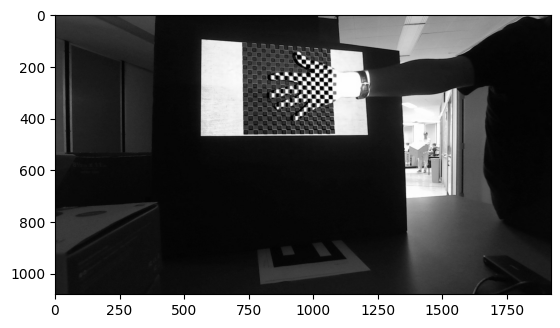

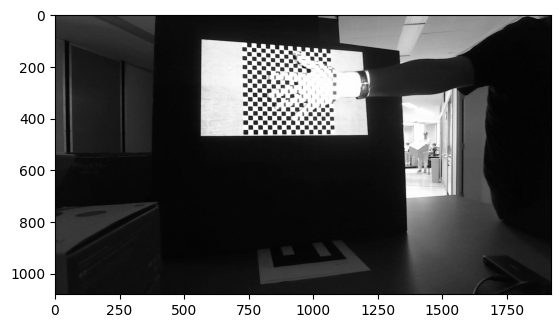

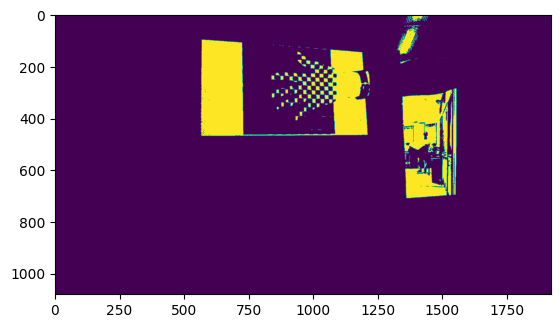

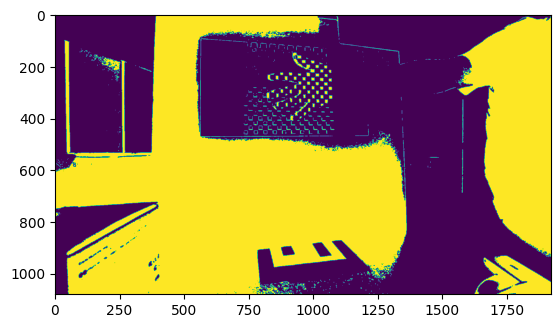

(1080, 1920)


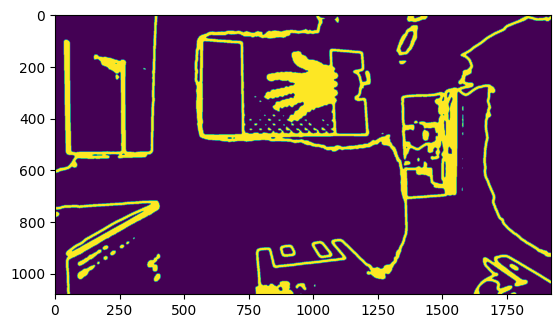

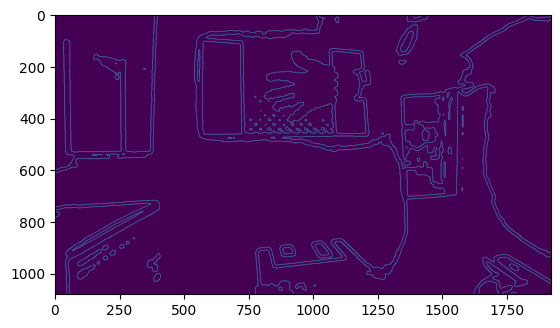

In [143]:
img = cv2.imread("Gray_WIN_20241001_12_32_36_Pro.jpg")

img2 = cv2.imread('image.png')
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
#invert the image
#scale intensity down by 0.8
gray = cv2.convertScaleAbs(gray, alpha=0.7, beta=0)

img2 = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
_, threshold1 = cv2.threshold(img, 80, 255, cv2.THRESH_BINARY)
rows,cols,ch = img.shape
print(rows,cols,ch)

pts1 = np.float32([[0,0],[352,0],[0,352],[352,352]])
pts2 = np.float32([[723,110],[1063,138],[728,465],[1082, 462]]) # stadium tile coords

M = cv2.getPerspectiveTransform(pts1,pts2)    
dst = cv2.warpPerspective(img2,M,(cols,rows))
sub = cv2.subtract(img, dst)
add = cv2.add(img, dst)
#blurred sub
blurSub = cv2.GaussianBlur(sub, (3,3), 0)
#get only bright and dark pixels
plt.imshow(sub)
plt.show()
plt.imshow(add)
plt.show()
brightPix = cv2.inRange(sub, (200,200,200), (255,255,255))
darkPix = cv2.inRange(blurSub, (0,0,0), (20,20,20))
plt.imshow(brightPix)
plt.show()
plt.imshow(darkPix)
plt.show()
#add bright and dark pixels
final = cv2.add(brightPix, darkPix)
final = cv2.GaussianBlur(final, (31,31), 0)
print(final.shape)
final = cv2.inRange(final, 50,230)
plt.imshow(final)
plt.show()
edges = cv2.Canny(final, 50, 200)
plt.imshow(edges)
plt.show()